In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Build BackBeta DF
dfbb = pd.read_csv('BackBeta.csv')
dfbsp=pd.read_csv('BSPRTN.csv')
dfbsp.rename(columns={'caldt':'datadate'},inplace=True)
dfbmerge=dfbb.merge(dfbsp, on = "datadate", how = "left") 
dfbmerge.dropna(inplace=True)
dfbmerge

,gvkey,datadate,indfmt,consol,popsrc,datafmt,curcd,costat,LINKTYPE,LPERMNO,PERMNO,YYYYMM,MthCalDt,MthRet,Ticker,sprtrn
0,1004,1995-05-31,INDL,C,D,STD,USD,A,LU,54594,54594.0,199505.0,1995-05-31,0.109091,AIR,0.036312
1,1004,1996-05-31,INDL,C,D,STD,USD,A,LU,54594,54594.0,199605.0,1996-05-31,0.085890,AIR,0.022853
5,1013,1995-10-31,INDL,C,D,STD,USD,I,LU,50906,50906.0,199510.0,1995-10-31,-0.120879,ADCT,-0.004979
6,1013,1996-10-31,INDL,C,D,STD,USD,I,LU,50906,50906.0,199610.0,1996-10-31,0.068359,ADCT,0.026131
7,1013,1997-10-31,INDL,C,D,STD,USD,I,LU,50906,50906.0,199710.0,1997-10-31,0.019231,ADCT,-0.034478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39634,223007,1999-12-31,INDL,C,D,STD,USD,I,LC,84177,84177.0,199912.0,1999-12-31,0.131429,SMV,0.057844
39635,223007,1997-12-31,INDL,C,D,STD,USD,I,LC,84178,84178.0,199712.0,1997-12-31,-0.155779,SMV,0.015732
39636,223007,1998-12-31,INDL,C,D,STD,USD,I,LC,84178,84178.0,199812.0,1998-12-31,0.034483,SMV,0.056375
39637,223007,1999-12-31,INDL,C,D,STD,USD,I,LC,84178,84178.0,199912.0,1999-12-31,0.112583,SMV,0.057844


In [3]:
#Build FwdBeta DF
dffb = pd.read_csv('FwdBeta.csv')
dffsp=pd.read_csv('FSPRTN.csv')
dffsp.rename(columns={'caldt':'datadate'},inplace=True)
dffmerge=dffb.merge(dffsp, on = "datadate", how = "left") 
dffmerge.dropna(inplace=True)
dffmerge

,gvkey,datadate,indfmt,consol,popsrc,datafmt,curcd,costat,LINKTYPE,LPERMNO,PERMNO,YYYYMM,MthCalDt,MthRet,Ticker,sprtrn
0,1004,2000-05-31,INDL,C,D,STD,USD,A,LU,54594,54594.0,200005.0,2000-05-31,-0.078838,AIR,-0.021915
1,1004,2001-05-31,INDL,C,D,STD,USD,A,LU,54594,54594.0,200105.0,2001-05-31,0.246661,AIR,0.005090
2,1004,2002-05-31,INDL,C,D,STD,USD,A,LU,54594,54594.0,200205.0,2002-05-31,-0.100211,AIR,-0.009081
5,1013,2000-10-31,INDL,C,D,STD,USD,I,LU,50906,50906.0,200010.0,2000-10-31,-0.205113,ADCT,-0.004949
6,1013,2001-10-31,INDL,C,D,STD,USD,I,LU,50906,50906.0,200110.0,2001-10-31,0.303725,ADCT,0.018099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34347,252940,2003-03-31,INDL,C,D,STD,USD,A,LC,75811,75811.0,200303.0,2003-03-31,-0.153298,MTF,0.008358
34348,252940,2004-03-31,INDL,C,D,STD,USD,A,LC,75811,75811.0,200403.0,2004-03-31,0.279997,MTF,-0.016359
34349,254338,2003-12-31,INDL,C,D,STD,USD,A,LC,89581,89581.0,200312.0,2003-12-31,0.266212,CHA,0.050765
34350,254338,2004-12-31,INDL,C,D,STD,USD,A,LC,89581,89581.0,200412.0,2004-12-31,-0.000815,CHA,0.032458


In [5]:
#build fundamentals dataframe
dffundb = pd.read_csv('funda.csv')
dffundb['igpm']=dffundb['gpm']-dffundb['gpm'].mean()
dffundb['icfm']=dffundb['cfm']-dffundb['cfm'].mean()
dffundb['idebt_ebitda']=dffundb['debt_ebitda']-dffundb['debt_ebitda'].mean()
dffundb['iinv_turn']=dffundb['inv_turn']-dffundb['inv_turn'].mean()
dffundb['irect_turn']=dffundb['rect_turn']-dffundb['rect_turn'].mean()
dffundb['ipay_turn']=dffundb['pay_turn']-dffundb['pay_turn'].mean()
dffundb['iroe']=dffundb['roe']-dffundb['roe'].mean()
dffundb['datadate']=dffundb['public_date']
dffundb.dropna(inplace=True)
dffundb

,gvkey,adate,qdate,public_date,gpm,cfm,roe,debt_ebitda,inv_turn,rect_turn,pay_turn,TICKER,igpm,icfm,idebt_ebitda,iinv_turn,irect_turn,ipay_turn,iroe,datadate
0,1004,1994-05-31,1994-11-30,1995-01-31,0.199,0.045,0.038,3.722,1.804,4.860,7.807,AIR,1.507213,6.839061e+12,2.655253,-42.581858,-12.181001,-4.759193,0.085673,1995-01-31
1,1004,1994-05-31,1994-11-30,1995-02-28,0.199,0.045,0.038,3.722,1.804,4.860,7.807,AIR,1.507213,6.839061e+12,2.655253,-42.581858,-12.181001,-4.759193,0.085673,1995-02-28
2,1004,1994-05-31,1994-11-30,1995-03-31,0.199,0.045,0.038,3.722,1.804,4.860,7.807,AIR,1.507213,6.839061e+12,2.655253,-42.581858,-12.181001,-4.759193,0.085673,1995-03-31
3,1004,1994-05-31,1995-02-28,1995-04-30,0.192,0.044,0.042,3.592,1.947,4.839,7.411,AIR,1.500213,6.839061e+12,2.525253,-42.438858,-12.202001,-5.155193,0.089673,1995-04-30
4,1004,1994-05-31,1995-02-28,1995-05-31,0.192,0.044,0.042,3.592,1.947,4.839,7.411,AIR,1.500213,6.839061e+12,2.525253,-42.438858,-12.202001,-5.155193,0.089673,1995-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802092,266216,2004-12-31,2005-06-30,2005-08-31,0.591,0.122,0.044,8.205,24.208,0.075,0.036,ACFC,1.899213,6.839061e+12,7.138253,-20.177858,-16.966001,-12.530193,0.091673,2005-08-31
802093,266216,2004-12-31,2005-06-30,2005-09-30,0.591,0.122,0.044,8.205,24.208,0.075,0.036,ACFC,1.899213,6.839061e+12,7.138253,-20.177858,-16.966001,-12.530193,0.091673,2005-09-30
802094,266216,2004-12-31,2005-06-30,2005-10-31,0.591,0.122,0.044,8.205,24.208,0.075,0.036,ACFC,1.899213,6.839061e+12,7.138253,-20.177858,-16.966001,-12.530193,0.091673,2005-10-31
802095,266216,2004-12-31,2005-09-30,2005-11-30,0.583,0.143,0.048,8.705,24.746,0.078,0.038,ACFC,1.891213,6.839061e+12,7.638253,-19.639858,-16.963001,-12.528193,0.095673,2005-11-30


In [6]:
#back beta
bbetas = []

# Loop through each ticker and perform the regression
for ticker in dfbmerge['Ticker'].unique():
    # Subset the DataFrame for the current ticker
    company_data = dfbmerge[dfbmerge['Ticker'] == ticker]
    
    # Define the dependent variable (company returns) and the independent variable (S&P 500 returns)
    X = company_data['sprtrn']
    y = company_data['MthRet']
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Retrieve the beta coefficient (the coefficient of sp500_returns)
    beta = model.params['sprtrn']
    
    # Append the result to the list
    bbetas.append({'TICKER': ticker, 'BackBeta': beta})

# Convert the results to a DataFrame
bbeta_df = pd.DataFrame(bbetas)
bbeta_df

NameError: name 'date' is not defined

In [9]:
# back beta
bbetas = []

# Loop through each ticker and perform the regression
for ticker in dfbmerge['Ticker'].unique():
  # Subset the DataFrame for the current ticker
  company_data = dfbmerge[dfbmerge['Ticker'] == ticker]

  # Define the dependent variable (company returns) and the independent variable (S&P 500 returns)
  X = company_data['sprtrn']
  y = company_data['MthRet']

  # Add a constant to the independent variables
  X = sm.add_constant(X)

  # Perform the regression
  model = sm.OLS(y, X).fit()

  # Retrieve the beta coefficient (the coefficient of sp500_returns)
  beta = model.params['sprtrn']

  # Get additional data (assuming you have columns for these in dfbmerge)
  #company_name = company_data['Company Name'].iloc[0]  # Assuming the first row has the name
  date = company_data['datadate'].iloc[0]  # Assuming the first row has the date

  # Calculate additional metrics (optional)
  # r_squared = model.rsquared
  # std_error = model.bse['sprtrn']
  # p_value = model.pvalues['sprtrn']

  # Append the result to the list with additional data
  bbetas.append({
      'TICKER': ticker,
      'BackBeta': beta,
      'Date': date,
      # Add other data points as needed (optional)
      # 'R-Squared': r_squared,
      # 'Std Error': std_error,
      # 'p-value': p_value
  })

# Convert the results to a DataFrame
bbeta_df = pd.DataFrame(bbetas)
bbeta_df

,TICKER,BackBeta,Date
0,AIR,1.723828,1995-05-31
1,ADCT,0.858516,1995-10-31
2,AELNA,16.769363,1995-02-28
3,AFPC,-7.117942,1995-06-30
4,ALO,-1.944434,1996-12-31
...,...,...,...
10978,NECSY,1.097809,1998-12-31
10979,NECS,6.566074,1999-12-31
10980,GMK,-1.234856,1999-12-31
10981,SMV,5.957099,1997-12-31


In [12]:
#forward beta
fbetas = []

# Loop through each ticker and perform the regression
for ticker in dffmerge['Ticker'].unique():
    # Subset the DataFrame for the current ticker
    company_data = dffmerge[dffmerge['Ticker'] == ticker]
    
    # Define the dependent variable (company returns) and the independent variable (S&P 500 returns)
    X = company_data['sprtrn']
    y = company_data['MthRet']
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Retrieve the beta coefficient (the coefficient of sp500_returns)
    beta = model.params['sprtrn']
    
    # Append the result to the list
    fbetas.append({'TICKER': ticker, 'ForwardBeta': beta})

# Convert the results to a DataFrame
fbeta_df = pd.DataFrame(fbetas)
fbeta_df

,TICKER,ForwardBeta
0,AIR,12.268302
1,ADCT,4.564300
2,ALO,1.152357
3,AEN,-3.441872
4,AMR,2.221877
...,...,...
8136,OTIV,9.682417
8137,WF,0.806612
8138,MTF,-17.530242
8139,CHA,14.586060


In [10]:
#fundamental beta
fund=bbeta_df.merge(dffundb, on = "TICKER", how = "left") 
fund.dropna(inplace=True)
fundbetas = []

# Loop through each ticker and perform the regression
for ticker in fund['TICKER'].unique():
    # Subset the DataFrame for the current ticker
    company_data = fund[fund['TICKER'] == ticker]
    
    # Define the dependent variable (company returns) and the independent variable (S&P 500 returns)
    X = company_data[['igpm','icfm','idebt_ebitda','ipay_turn','iinv_turn','irect_turn','iroe']]
    y = company_data['BackBeta']
    
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Retrieve the fitted values for fundamental beta values
    fitted_values = model.predict(X)
    
    # Append the result to the list
    fundbetas.append({'TICKER': ticker, 'FundBeta': fitted_values})

# Convert the results to a DataFrame
fundbeta_df = pd.DataFrame(fundbetas)
fundbeta_df['FundBeta'] = fundbeta_df['FundBeta'].astype(str)
import re
def extract_number(text):
    match = re.search(r'-?\d+\.\d+', text)
    return match.group(0) if match else None
fundbeta_df['FundBeta'] = fundbeta_df['FundBeta'].apply(extract_number)
fundbeta_df['FundBeta']=fundbeta_df['FundBeta'].astype(float)
fundbeta_df

,TICKER,FundBeta
0,AIR,1.723828
1,ADCT,0.858516
2,AELNA,16.769363
3,AFPC,-7.117942
4,ALO,-1.944434
...,...,...
7437,VCAP,-0.132978
7438,GCFC,-0.157493
7439,LNCB,-1.720732
7440,ONFC,1.029044


In [13]:
#Beta Merge
initialmerge=bbeta_df.merge(fbeta_df, on = "TICKER", how = "left") 
finalmerge=initialmerge.merge(fundbeta_df, on='TICKER', how='left')
finalmerge.dropna(inplace=True)
finalmerge.reset_index(drop=True, inplace=True)
finalmerge

,TICKER,BackBeta,Date,ForwardBeta,FundBeta
0,AIR,1.723828,1995-05-31,12.268302,1.723828
1,ADCT,0.858516,1995-10-31,4.564300,0.858516
2,ALO,-1.944434,1996-12-31,1.152357,-1.944434
3,UDI,-0.111497,1996-12-31,-0.101602,-0.111497
4,AM,0.427481,1995-07-31,-1.434586,0.427481
...,...,...,...,...,...
4013,MCBI,-1.435482,1999-12-31,0.742034,-1.435482
4014,GCFC,-0.157493,1999-12-31,0.508784,-0.157493
4015,LNCB,-1.720732,1999-12-31,1.307797,-1.720732
4016,ONFC,1.029044,1999-12-31,0.432446,1.029044


In [12]:
finalmerge.to_excel("betasoutput.xlsx", index=False)

# Initial Model Testing

In [17]:
# Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = finalmerge[['BackBeta','FundBeta']]  # Independent variable (features)
y = finalmerge['ForwardBeta']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the model coefficients and MSE
#print(f"Model coefficients: {model.coef_[0][0]}")
#print(f"Model intercept: {model.intercept_[0]}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 117.71


Mean Squared Error: 145.39
R-squared: -0.00


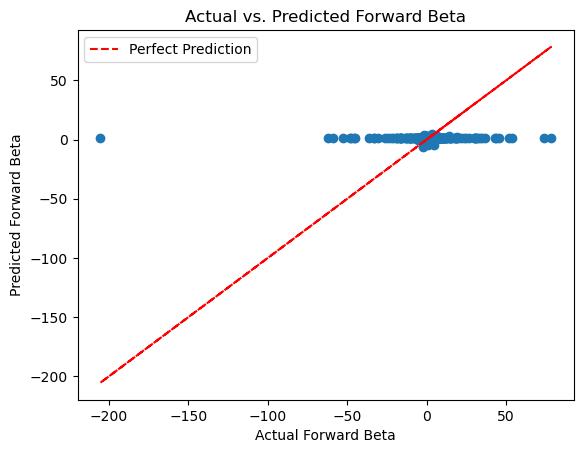

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select only Back Beta as the independent variable
X = finalmerge[['BackBeta']]  # Independent variable (features)

# Dependent variable (target)
y = finalmerge['ForwardBeta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r_squared = model.score(X_test, y_test)

# Print the model metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Forward Beta")
plt.ylabel("Predicted Forward Beta")
plt.title("Actual vs. Predicted Forward Beta")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Prediction")  # Add a perfect prediction line
plt.legend()
plt.show()

Mean Squared Error: 117.84
R-squared: -0.01


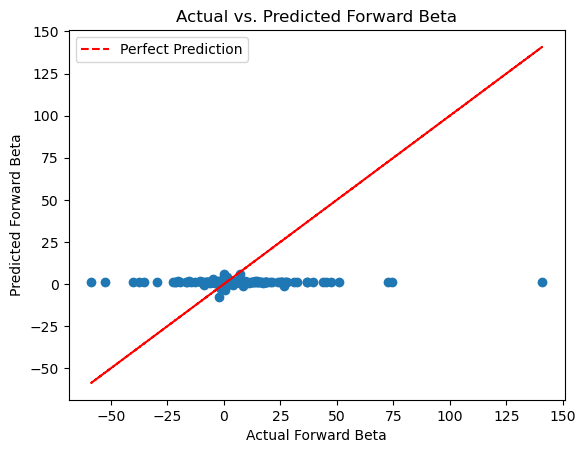

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select only Back Beta as the independent variable
X = finalmerge[['FundBeta']]  # Independent variable (features)

# Dependent variable (target)
y = finalmerge['ForwardBeta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r_squared = model.score(X_test, y_test)

# Print the model metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Forward Beta")
plt.ylabel("Predicted Forward Beta")
plt.title("Actual vs. Predicted Forward Beta")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Prediction")  # Add a perfect prediction line
plt.legend()
plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = finalmerge[['BackBeta','FundBeta']]  # Independent variable (features)
y = finalmerge['ForwardBeta']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # Ravel y_train to avoid warning

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 189.34


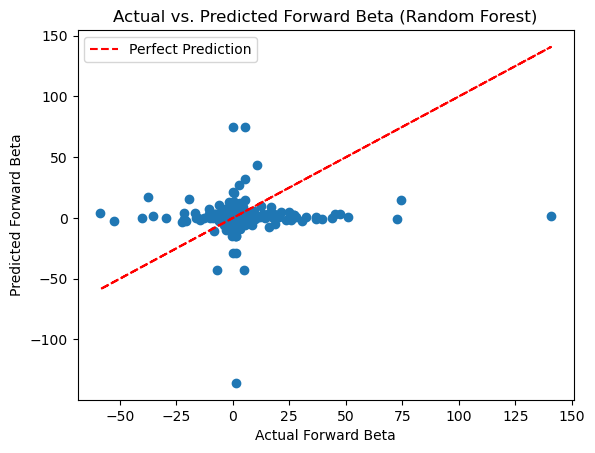

189.3436255116782


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select only Back Beta as the independent variable
X = finalmerge[['BackBeta']]  # Independent variable (features)

# Dependent variable (target)
y = finalmerge['ForwardBeta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # Ravel y_train to avoid warning

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Forward Beta")
plt.ylabel("Predicted Forward Beta")
plt.title("Actual vs. Predicted Forward Beta (Random Forest)")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Prediction")  # Add a perfect prediction line
plt.legend()
plt.show()

# Return the MSE as the error metric
print(mse)

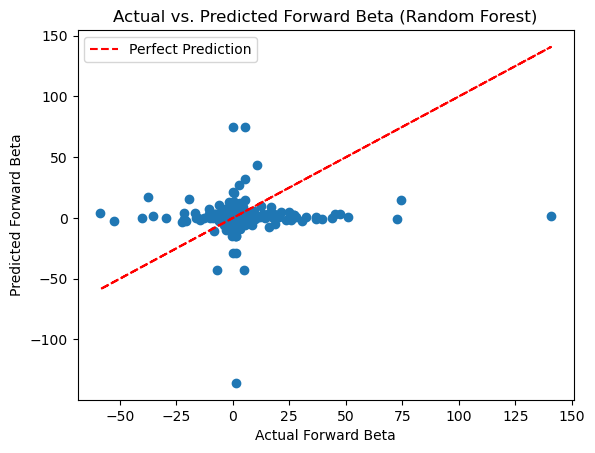

189.3436255116782


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select only Back Beta as the independent variable
X = finalmerge[['BackBeta']]  # Independent variable (features)

# Dependent variable (target)
y = finalmerge['ForwardBeta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # Ravel y_train to avoid warning

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Forward Beta")
plt.ylabel("Predicted Forward Beta")
plt.title("Actual vs. Predicted Forward Beta (Random Forest)")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Prediction")  # Add a perfect prediction line
plt.legend()
plt.show()

# Return the MSE as the error metric
print(mse)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load times series data

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Passengers'].values.reshape(-1, 1))

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust as needed
X_train, y_train = create_sequences(scaled_data, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
test_data = scaled_data[-seq_length:]
X_test, y_test = create_sequences(test_data, seq_length)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
plt.plot(df['Passengers'].values, label='Actual')
plt.plot(range(len(df)-seq_length, len(df)), predictions, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.title('LSTM Time Series Prediction')
plt.legend()
plt.show()
